In [1]:
pip install cfbd --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cfbd
import re
from datetime import datetime

In [3]:
with open('keys/keys.json') as fi:
    credentials = json.load(fi)

In [4]:
api_key = credentials['api_key']

In [5]:
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = api_key
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_config = cfbd.ApiClient(configuration)

In [6]:
lines = pd.concat( 
    map(pd.read_csv, ['lines_data\lines_2018.csv', 'lines_data\lines_2019.csv', 'lines_data\lines_2020.csv', 'lines_data\lines_2021.csv', 'lines_data\lines_2022.csv']), ignore_index=True)

In [7]:
lines = lines.drop('Unnamed: 0', axis=1)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
fbs = ['FBS Independents', 'Conference USA', 'Mountain West','American Athletic', 'Mid-American', 'SEC', 'Pac-12', 'Big Ten',
       'ACC', 'Big 12', 'Sun Belt']

In [10]:
fcs = ['AWC', 'Atlantic Sun', 'Southern',
       'SWAC', 'MVFC', 'OVC', 'Big South', 'CAA', 'NEC',
       'Western Athletic', 'Big Sky', 'MEAC', 'Southland', 'Patriot',
       'Ivy', 'Pioneer']

In [11]:
p5 = ['SEC', 'Pac-12', 'Big Ten', 'ACC', 'Big 12']

In [12]:
g5 = ['Conference USA', 'Mountain West','American Athletic', 'Mid-American', 'Sun Belt']

In [13]:
lines = lines.drop(['covering_team'], axis=1)

In [14]:
lines = lines.dropna()

In [15]:
lines

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error
0,401013357,2018,1,regular,2018-08-25,UMass,FBS Independents,63.0,Duquesne,NEC,15.0,UMass -21,-21.0,-48.0,27.0,21.0,48.0,-27.0,27.0
1,401014972,2018,1,regular,2018-08-25,Rice,Conference USA,31.0,Prairie View,SWAC,28.0,Rice -22.5,-22.5,-3.0,-19.5,22.5,3.0,19.5,19.5
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,26.0
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,16.5
4,401020671,2018,1,regular,2018-08-30,Ball State,Mid-American,42.0,Central Connecticut,NEC,6.0,Ball State -19.5,-19.5,-36.0,16.5,19.5,36.0,-16.5,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,12.5
4180,401437132,2022,14,regular,2022-12-03,Jackson State,SWAC,43.0,Southern,SWAC,24.0,Jackson State -20.5,-20.5,-19.0,-1.5,20.5,19.0,1.5,1.5
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,21.5
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,5.0


In [114]:
home_games = lines['home_conference'].value_counts().reset_index()
home_games.columns = ['Conference','Home Games']

In [115]:
away_games = lines['away_conference'].value_counts().reset_index()
away_games.columns = ['Conference','Away Games']

In [117]:
games_count = pd.merge(home_games, away_games, on="Conference")

In [119]:
games_count['Total Games'] = games_count['Home Games'] + games_count['Away Games']

In [122]:
games_count.sort_values('Total Games', ascending=False) 

,Conference,Home Games,Away Games,Total Games
0,SEC,480,335,815
1,ACC,446,364,810
2,Big Ten,432,336,768
3,Conference USA,368,376,744
5,Mountain West,324,312,636
4,Pac-12,342,292,634
6,American Athletic,321,305,626
8,Sun Belt,313,309,622
9,Mid-American,296,317,613
7,Big 12,319,258,577


In [18]:
# % of time vegas hits the spread exactly
((len(lines) - len(lines[lines['vegas_error']==0]))/len(lines)-1)*-1*100

1.6977522716403626

In [19]:
teams = []
for x in lines.iterrows():
    if x[1]['home_diff'] == 0:
        teams.append("Push")
    elif x[1]['home_diff'] < 0:
        teams.append(x[1]['away_team'])
    elif x[1]['home_diff'] > 0:
        teams.append(x[1]['home_team'])

In [20]:
lines['covering_team'] = teams

In [21]:
lines

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error,covering_team
0,401013357,2018,1,regular,2018-08-25,UMass,FBS Independents,63.0,Duquesne,NEC,15.0,UMass -21,-21.0,-48.0,27.0,21.0,48.0,-27.0,27.0,UMass
1,401014972,2018,1,regular,2018-08-25,Rice,Conference USA,31.0,Prairie View,SWAC,28.0,Rice -22.5,-22.5,-3.0,-19.5,22.5,3.0,19.5,19.5,Prairie View
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,26.0,Hawai'i
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,16.5,UCF
4,401020671,2018,1,regular,2018-08-30,Ball State,Mid-American,42.0,Central Connecticut,NEC,6.0,Ball State -19.5,-19.5,-36.0,16.5,19.5,36.0,-16.5,16.5,Ball State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,12.5,Troy
4180,401437132,2022,14,regular,2022-12-03,Jackson State,SWAC,43.0,Southern,SWAC,24.0,Jackson State -20.5,-20.5,-19.0,-1.5,20.5,19.0,1.5,1.5,Southern
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,21.5,Clemson
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,5.0,Michigan


In [22]:
game_winner = []
for x in lines.iterrows():
    if x[1]['home_score'] > x[1]['away_score']:
        game_winner.append(x[1]['home_team'])
    else:
        game_winner.append(x[1]['away_team'])

In [23]:
lines['game_winner'] = game_winner

In [24]:
favorite = []
for x in lines.iterrows():
    if x[1]['away_spread'] > x[1]['home_spread']:
        favorite.append(x[1]['home_team'])
    else:
        favorite.append(x[1]['away_team'])

In [25]:
lines['favorite'] = favorite

In [26]:
underdog = []
for x in lines.iterrows():
    if x[1]['away_spread'] < x[1]['home_spread']:
        underdog.append(x[1]['home_team'])
    else:
        underdog.append(x[1]['away_team'])

In [27]:
lines['underdog'] = underdog

In [28]:
accuracy = []
for x in lines.iterrows():
    if (x[1]['vegas_error'] <=7):
        accuracy.append('Prediction within 7')
    elif (x[1]['vegas_error'] <=14):
        accuracy.append('Prediction within 14')
    else:
        accuracy.append('Prediction outside 14')

In [29]:
lines['accuracy'] = accuracy

In [30]:
lines

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error,covering_team,game_winner,favorite,underdog,accuracy
0,401013357,2018,1,regular,2018-08-25,UMass,FBS Independents,63.0,Duquesne,NEC,15.0,UMass -21,-21.0,-48.0,27.0,21.0,48.0,-27.0,27.0,UMass,UMass,UMass,Duquesne,Prediction outside 14
1,401014972,2018,1,regular,2018-08-25,Rice,Conference USA,31.0,Prairie View,SWAC,28.0,Rice -22.5,-22.5,-3.0,-19.5,22.5,3.0,19.5,19.5,Prairie View,Rice,Rice,Prairie View,Prediction outside 14
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,26.0,Hawai'i,Hawai'i,Colorado State,Hawai'i,Prediction outside 14
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,16.5,UCF,UCF,UCF,Connecticut,Prediction outside 14
4,401020671,2018,1,regular,2018-08-30,Ball State,Mid-American,42.0,Central Connecticut,NEC,6.0,Ball State -19.5,-19.5,-36.0,16.5,19.5,36.0,-16.5,16.5,Ball State,Ball State,Ball State,Central Connecticut,Prediction outside 14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,12.5,Troy,Troy,Troy,Coastal Carolina,Prediction within 14
4180,401437132,2022,14,regular,2022-12-03,Jackson State,SWAC,43.0,Southern,SWAC,24.0,Jackson State -20.5,-20.5,-19.0,-1.5,20.5,19.0,1.5,1.5,Southern,Jackson State,Jackson State,Southern,Prediction within 7
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,21.5,Clemson,Clemson,Clemson,North Carolina,Prediction outside 14
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,5.0,Michigan,Michigan,Michigan,Purdue,Prediction within 7


In [31]:
prediction = []
for x in lines.iterrows():
    if x[1]['game_winner'] == x[1]['favorite']:
        prediction.append('Yes')
    else:
        prediction.append('No')

In [32]:
lines['correct_predict'] = prediction

In [33]:
lines['correct_predict'].value_counts(normalize=True)

Yes    0.761597
No     0.238403
Name: correct_predict, dtype: float64

In [34]:
lines_fbs = lines[(lines['home_conference'].isin(fbs))&(lines['away_conference'].isin(fbs))]

In [35]:
lines_fbs

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error,covering_team,game_winner,favorite,underdog,accuracy,correct_predict
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,26.0,Hawai'i,Hawai'i,Colorado State,Hawai'i,Prediction outside 14,No
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,16.5,UCF,UCF,UCF,Connecticut,Prediction outside 14,Yes
7,401012880,2018,1,regular,2018-08-31,Michigan State,Big Ten,38.0,Utah State,Mountain West,31.0,Michigan State -23.5,-23.5,-7.0,-16.5,23.5,7.0,16.5,16.5,Utah State,Michigan State,Michigan State,Utah State,Prediction outside 14,Yes
8,401013086,2018,1,regular,2018-08-31,Tulane,American Athletic,17.0,Wake Forest,ACC,23.0,Wake Forest -7.5,7.5,6.0,1.5,-7.5,-6.0,-1.5,1.5,Tulane,Wake Forest,Wake Forest,Tulane,Prediction within 7,Yes
9,401013089,2018,1,regular,2018-08-31,Duke,ACC,34.0,Army,FBS Independents,14.0,Duke -14,-14.0,-20.0,6.0,14.0,20.0,-6.0,6.0,Duke,Duke,Duke,Army,Prediction within 7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,401437036,2022,14,regular,2022-12-03,Georgia,SEC,50.0,LSU,SEC,30.0,Georgia -17.5,-17.5,-20.0,2.5,17.5,20.0,-2.5,2.5,Georgia,Georgia,Georgia,LSU,Prediction within 7,Yes
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,12.5,Troy,Troy,Troy,Coastal Carolina,Prediction within 14,Yes
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,21.5,Clemson,Clemson,Clemson,North Carolina,Prediction outside 14,Yes
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,5.0,Michigan,Michigan,Michigan,Purdue,Prediction within 7,Yes


In [36]:
#lines_fbs.to_csv('lines_fbs.csv')

In [37]:
len(lines_fbs[lines_fbs['vegas_error']<1])

161

In [38]:
# % of time vegas hits the spread exactly
((len(lines_fbs) - len(lines_fbs[lines_fbs['vegas_error']<1]))/len(lines_fbs)-1)*-1*100

4.784546805349188

In [39]:
lines_fbs[lines_fbs['covering_team'] == 'Push']

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error,covering_team,game_winner,favorite,underdog,accuracy,correct_predict
30,401012684,2018,1,regular,2018-09-01,California,Pac-12,24.0,North Carolina,ACC,17.0,California -7,-7.0,-7.0,0.0,7.0,7.0,-0.0,0.0,Push,California,California,North Carolina,Prediction within 7,Yes
72,401012681,2018,1,regular,2018-09-02,Oregon,Pac-12,58.0,Bowling Green,Mid-American,24.0,Oregon -34,-34.0,-34.0,0.0,34.0,34.0,-0.0,0.0,Push,Oregon,Oregon,Bowling Green,Prediction within 7,Yes
102,401013027,2018,2,regular,2018-09-08,UT San Antonio,Conference USA,20.0,Baylor,Big 12,37.0,Baylor -17,17.0,17.0,0.0,-17.0,-17.0,-0.0,0.0,Push,Baylor,Baylor,UT San Antonio,Prediction within 7,Yes
231,401013127,2018,4,regular,2018-09-22,Syracuse,ACC,51.0,Connecticut,American Athletic,21.0,Syracuse -30,-30.0,-30.0,0.0,30.0,30.0,-0.0,0.0,Push,Syracuse,Syracuse,Connecticut,Prediction within 7,Yes
257,401022522,2018,4,regular,2018-09-23,Utah State,Mountain West,42.0,Air Force,Mountain West,32.0,Utah State -10,-10.0,-10.0,0.0,10.0,10.0,-0.0,0.0,Push,Utah State,Utah State,Air Force,Prediction within 7,Yes
511,401022544,2018,9,regular,2018-10-27,Air Force,Mountain West,38.0,Boise State,Mountain West,48.0,Boise State -10,10.0,10.0,0.0,-10.0,-10.0,-0.0,0.0,Push,Boise State,Boise State,Air Force,Prediction within 7,Yes
516,401013189,2018,9,regular,2018-10-28,Navy,American Athletic,22.0,Notre Dame,FBS Independents,44.0,Notre Dame -22,22.0,22.0,0.0,-22.0,-22.0,-0.0,0.0,Push,Notre Dame,Notre Dame,Navy,Prediction within 7,Yes
537,401012869,2018,10,regular,2018-11-03,Purdue,Big Ten,38.0,Iowa,Big Ten,36.0,Purdue -2,-2.0,-2.0,0.0,2.0,2.0,-0.0,0.0,Push,Purdue,Purdue,Iowa,Prediction within 7,Yes
549,401013188,2018,10,regular,2018-11-03,Texas,Big 12,41.0,West Virginia,Big 12,42.0,West Virginia -1,1.0,1.0,0.0,-1.0,-1.0,-0.0,0.0,Push,West Virginia,West Virginia,Texas,Prediction within 7,Yes
551,401013345,2018,10,regular,2018-11-03,Northwestern,Big Ten,21.0,Notre Dame,FBS Independents,31.0,Notre Dame -10,10.0,10.0,0.0,-10.0,-10.0,-0.0,0.0,Push,Notre Dame,Notre Dame,Northwestern,Prediction within 7,Yes


In [40]:
best_vegas_error = lines_fbs[lines_fbs['vegas_error']<1]

In [41]:
len(best_vegas_error)

161

In [42]:
best_vegas_error_conf = best_vegas_error[['home_conference','away_conference']].apply(pd.Series.value_counts)

In [43]:
best_vegas_error_conf['Total Teams'] = best_vegas_error_conf['home_conference'] + best_vegas_error_conf['away_conference']

In [44]:
best_vegas_error_conf['Percent of Teams'] = round((best_vegas_error_conf['Total Teams']/best_vegas_error_conf['Total Teams'].sum())*100,1)

In [45]:
best_vegas_error_conf

,home_conference,away_conference,Total Teams,Percent of Teams
ACC,16,15,31,9.6
American Athletic,11,12,23,7.1
Big 12,21,20,41,12.7
Big Ten,25,23,48,14.9
Conference USA,9,14,23,7.1
FBS Independents,5,3,8,2.5
Mid-American,7,12,19,5.9
Mountain West,13,14,27,8.4
Pac-12,17,15,32,9.9
SEC,21,21,42,13.0


In [46]:
best_vegas_error_conf = best_vegas_error_conf.drop(['home_conference','away_conference'], axis=1).sort_values('Total Teams', ascending=False)

In [47]:
best_vegas_error_conf

,Total Teams,Percent of Teams
Big Ten,48,14.9
SEC,42,13.0
Big 12,41,12.7
Pac-12,32,9.9
ACC,31,9.6
Sun Belt,28,8.7
Mountain West,27,8.4
American Athletic,23,7.1
Conference USA,23,7.1
Mid-American,19,5.9


In [48]:
worst_vegas_error = lines_fbs.sort_values('vegas_error').tail(161)

In [49]:
worst_vegas_error_conf = worst_vegas_error[['home_conference','away_conference']].apply(pd.Series.value_counts)

In [50]:
worst_vegas_error_conf['Total Teams'] = worst_vegas_error_conf['home_conference'] + worst_vegas_error_conf['away_conference']

In [51]:
worst_vegas_error_conf['Percent of Teams'] = round((worst_vegas_error_conf['Total Teams']/worst_vegas_error_conf['Total Teams'].sum())*100,1)

In [52]:
worst_vegas_error_conf = worst_vegas_error_conf.drop(['home_conference','away_conference'], axis=1).sort_values('Total Teams', ascending=False)

In [53]:
worst_vegas_error_conf

,Total Teams,Percent of Teams
Conference USA,47,14.6
Big Ten,44,13.7
ACC,41,12.7
Sun Belt,31,9.6
Big 12,28,8.7
American Athletic,26,8.1
Mountain West,26,8.1
SEC,25,7.8
Mid-American,23,7.1
Pac-12,16,5.0


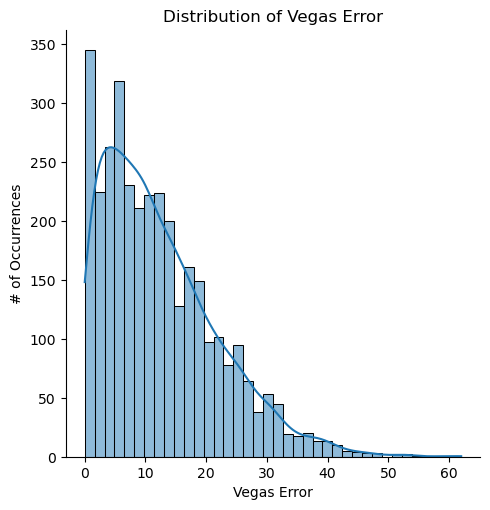

In [54]:
# Make default density plot
sns.displot(lines_fbs['vegas_error'], kde=True)
plt.xlabel('Vegas Error')
plt.ylabel("# of Occurrences")
plt.title("Distribution of Vegas Error")
plt.show()

In [55]:
#how 
accuracy_pie = lines_fbs['accuracy'].value_counts(normalize=True)
accuracy_pie

Prediction within 7      0.359584
Prediction outside 14    0.354829
Prediction within 14     0.285587
Name: accuracy, dtype: float64

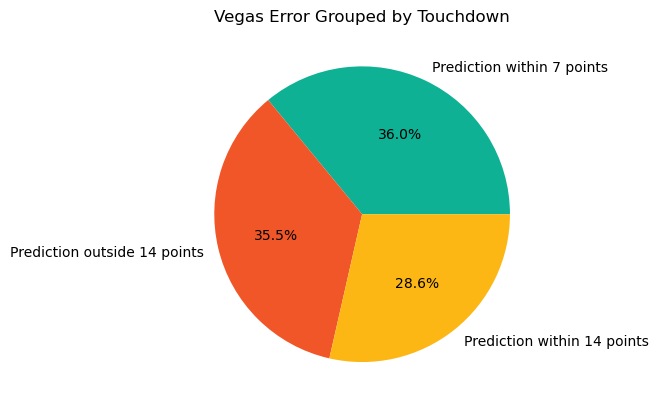

In [95]:
names = ['Prediction within 7 points','Prediction outside 14 points', 'Prediction within 14 points']
colors = ['#0EB194','#F15628','#fcb714']
plt.pie(accuracy_pie, labels=names, autopct='%1.1f%%',colors=colors)
plt.title('Vegas Error Grouped by Touchdown')
plt.show()

In [57]:
home_conf_sum = lines_fbs.groupby('home_conference')['vegas_error'].sum().sort_values(ascending=False).reset_index()
home_conf_sum.columns = ['Conference','sum_home']

In [58]:
home_conf_games = lines_fbs.value_counts('home_conference').reset_index()
home_conf_games.columns = ['Conference','home_games']

In [59]:
home_data = pd.merge(home_conf_sum, home_conf_games, on="Conference")

In [60]:
home_data

,Conference,sum_home,home_games
0,Big Ten,5504.5,412
1,ACC,5019.0,389
2,SEC,4871.5,423
3,Conference USA,4114.5,313
4,Big 12,3533.0,284
5,Mountain West,3480.5,283
6,Pac-12,3448.5,308
7,Mid-American,3320.0,256
8,American Athletic,3230.5,281
9,Sun Belt,3184.0,269


In [61]:
away_conf_sum = lines_fbs.groupby('away_conference')['vegas_error'].sum().sort_values(ascending=False).reset_index()
away_conf_sum.columns = ['Conference','sum_away']

In [62]:
away_conf_games = lines_fbs.value_counts('away_conference').reset_index()
away_conf_games.columns = ['Conference','away_games']

In [63]:
away_data = pd.merge(away_conf_sum, away_conf_games, on="Conference")

In [64]:
conf_error = pd.merge(home_data, away_data, on="Conference")

In [65]:
conf_error['Overall'] = (conf_error['sum_home']+conf_error['sum_away'])/(conf_error['home_games']+conf_error['away_games'])

In [66]:
conf_error['Home'] = (conf_error['sum_home'])/(conf_error['home_games'])

In [67]:
conf_error['Away'] = (conf_error['sum_away'])/(conf_error['away_games'])

In [68]:
conf_error = conf_error.drop(['sum_home','home_games','sum_away','away_games'], axis=1).sort_values('Overall',ascending=True)

In [69]:
conf_error

,Conference,Overall,Home,Away
6,Pac-12,11.233333,11.196429,11.272260
2,SEC,11.573219,11.516548,11.644776
5,Mountain West,11.896639,12.298587,11.532051
8,American Athletic,11.941980,11.496441,12.352459
4,Big 12,12.240775,12.440141,12.021318
9,Sun Belt,12.292388,11.836431,12.689320
10,FBS Independents,12.618123,12.816327,12.438272
7,Mid-American,12.668412,12.968750,12.425868
1,ACC,12.926959,12.902314,12.953297
3,Conference USA,13.034157,13.145367,12.941333


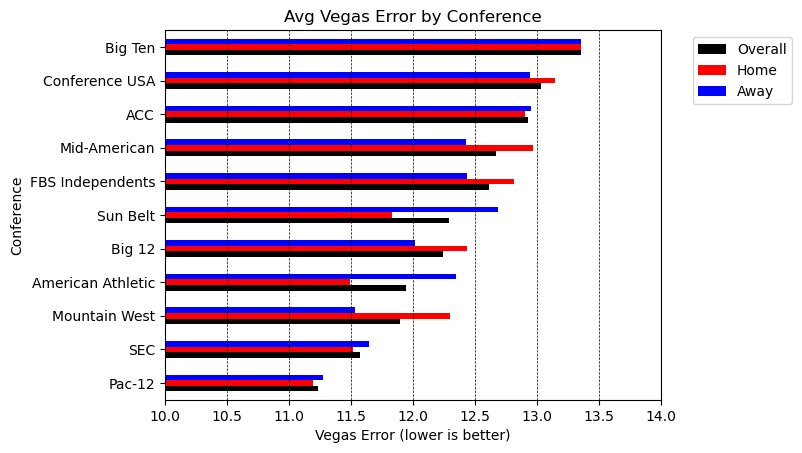

In [98]:
colors = ['black','red','blue']
ax = conf_error.plot.barh(x='Conference', xlabel = 'Vegas Error (lower is better)', ylabel = 'Conference', title='Avg Vegas Error by Conference',color=colors)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(axis = 'x', color='black', linestyle = '--', linewidth = 0.5)
plt.xlim(10,14)
plt.show()

In [71]:
lines_fbs

,id,season,week,season_type,date,home_team,home_conference,home_score,away_team,away_conference,away_score,formatted_spread,home_spread,home_result,home_diff,away_spread,away_result,away_diff,vegas_error,covering_team,game_winner,favorite,underdog,accuracy,correct_predict
2,401022510,2018,1,regular,2018-08-25,Colorado State,Mountain West,34.0,Hawai'i,Mountain West,43.0,Colorado State -17,-17.0,9.0,-26.0,17.0,-9.0,26.0,26.0,Hawai'i,Hawai'i,Colorado State,Hawai'i,Prediction outside 14,No
3,401019470,2018,1,regular,2018-08-30,Connecticut,American Athletic,17.0,UCF,American Athletic,56.0,UCF -22.5,22.5,39.0,-16.5,-22.5,-39.0,16.5,16.5,UCF,UCF,UCF,Connecticut,Prediction outside 14,Yes
7,401012880,2018,1,regular,2018-08-31,Michigan State,Big Ten,38.0,Utah State,Mountain West,31.0,Michigan State -23.5,-23.5,-7.0,-16.5,23.5,7.0,16.5,16.5,Utah State,Michigan State,Michigan State,Utah State,Prediction outside 14,Yes
8,401013086,2018,1,regular,2018-08-31,Tulane,American Athletic,17.0,Wake Forest,ACC,23.0,Wake Forest -7.5,7.5,6.0,1.5,-7.5,-6.0,-1.5,1.5,Tulane,Wake Forest,Wake Forest,Tulane,Prediction within 7,Yes
9,401013089,2018,1,regular,2018-08-31,Duke,ACC,34.0,Army,FBS Independents,14.0,Duke -14,-14.0,-20.0,6.0,14.0,20.0,-6.0,6.0,Duke,Duke,Duke,Army,Prediction within 7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,401437036,2022,14,regular,2022-12-03,Georgia,SEC,50.0,LSU,SEC,30.0,Georgia -17.5,-17.5,-20.0,2.5,17.5,20.0,-2.5,2.5,Georgia,Georgia,Georgia,LSU,Prediction within 7,Yes
4179,401437037,2022,14,regular,2022-12-03,Troy,Sun Belt,45.0,Coastal Carolina,Sun Belt,26.0,Troy -6.5,-6.5,-19.0,12.5,6.5,19.0,-12.5,12.5,Troy,Troy,Troy,Coastal Carolina,Prediction within 14,Yes
4181,401437009,2022,14,regular,2022-12-04,North Carolina,ACC,10.0,Clemson,ACC,39.0,Clemson -7.5,7.5,29.0,-21.5,-7.5,-29.0,21.5,21.5,Clemson,Clemson,Clemson,North Carolina,Prediction outside 14,Yes
4182,401437031,2022,14,regular,2022-12-04,Michigan,Big Ten,43.0,Purdue,Big Ten,22.0,Michigan -16,-16.0,-21.0,5.0,16.0,21.0,-5.0,5.0,Michigan,Michigan,Michigan,Purdue,Prediction within 7,Yes


In [72]:
home_team_sum = lines_fbs.groupby('home_team')['vegas_error'].sum().sort_values(ascending=False).reset_index()
home_team_sum.columns = ['Team','sum_home']

In [73]:
home_team_games = lines_fbs.value_counts('home_team').reset_index()
home_team_games.columns = ['Team','home_games']

In [74]:
home_team_data = pd.merge(home_team_sum, home_team_games, on="Team")

In [75]:
away_team_sum = lines_fbs.groupby('away_team')['vegas_error'].sum().sort_values(ascending=False).reset_index()
away_team_sum.columns = ['Team','sum_away']

In [76]:
away_team_games = lines_fbs.value_counts('away_team').reset_index()
away_team_games.columns = ['Team','away_games']

In [77]:
away_team_data = pd.merge(away_team_sum, away_team_games, on="Team")

In [78]:
team_error = pd.merge(home_team_data, away_team_data, on="Team")

In [79]:
team_error['Overall'] = round((team_error['sum_home']+team_error['sum_away'])/(team_error['home_games']+team_error['away_games']),1)

In [80]:
team_error['Home'] = round((team_error['sum_home'])/(team_error['home_games']),1)

In [81]:
team_error['Away'] = round((team_error['sum_away'])/(team_error['away_games']),1)

In [82]:
team_error = team_error.drop(['sum_home','home_games','sum_away','away_games'], axis=1).sort_values('Overall',ascending=True)

In [83]:
team_error.head(10)

,Team,Overall,Home,Away
127,Memphis,8.5,6.4,11.0
93,Ole Miss,9.5,9.5,9.3
101,Texas A&M,9.6,8.9,10.5
122,Arizona State,9.9,10.2,9.6
124,Washington,9.9,8.2,12.1
96,Stanford,10.0,11.9,8.5
102,Texas State,10.1,10.3,10.0
80,Indiana,10.2,11.4,9.1
30,Auburn,10.3,11.2,9.0
97,Cincinnati,10.3,11.0,9.5


In [84]:
team_error.sort_values('Overall', ascending=False).head(10)

,Team,Overall,Home,Away
130,James Madison,17.9,18.8,17.0
5,Maryland,16.4,16.5,16.2
35,Florida International,16.3,14.7,17.8
24,Bowling Green,16.3,17.8,15.2
4,Wisconsin,15.5,14.1,17.4
10,Duke,15.5,16.5,14.6
34,North Texas,15.5,14.2,16.7
12,Minnesota,15.0,15.2,14.8
25,Liberty,15.0,17.7,12.9
13,Illinois,14.8,15.1,14.4


In [85]:
team_error.mean()

C:\Users\antho\AppData\Local\Temp\ipykernel_18988\3862669533.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  team_error.mean()


Overall    12.392366
Home       12.416031
Away       12.381679
dtype: float64

In [86]:
big_ten = lines_fbs[lines_fbs['home_conference'] == 'Big Ten']['home_team'].unique()

In [87]:
big_ten_error = team_error[team_error['Team'].isin(big_ten)]

In [88]:
big_ten_error

,Team,Overall,Home,Away
80,Indiana,10.2,11.4,9.1
46,Iowa,11.4,10.9,12.1
29,Nebraska,11.5,12.9,10.0
26,Purdue,11.8,12.6,10.8
52,Penn State,12.4,11.0,14.2
18,Northwestern,12.6,13.0,12.3
20,Michigan State,13.4,13.1,13.8
0,Michigan,13.9,14.9,12.5
6,Ohio State,13.9,13.5,14.6
27,Rutgers,14.3,13.0,15.7


In [102]:
pac_12 = lines_fbs[lines_fbs['home_conference'] == 'Pac-12']['home_team'].unique()

In [103]:
pac_12_error = team_error[team_error['Team'].isin(pac_12)]

In [104]:
pac_12_error

,Team,Overall,Home,Away
122,Arizona State,9.9,10.2,9.6
124,Washington,9.9,8.2,12.1
96,Stanford,10.0,11.9,8.5
19,USC,10.6,12.7,8.0
110,Oregon State,10.6,10.2,11.1
116,Oregon,11.5,9.8,13.1
41,Colorado,11.6,13.2,9.9
111,California,11.8,10.6,13.0
99,Utah,11.9,10.9,12.8
21,UCLA,12.1,12.6,11.4
